In [21]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
# import seaborn as sns

import cv2
from sklearn.decomposition import PCA
import pickle
# from glob import glob

In [22]:
data = pickle.load(open('./data/data_images_100_100.pickle', mode = 'rb')) # load the data

In [23]:
#eigen face

In [24]:
#mean face

In [25]:
X = data.drop('gender', axis=1).values # all images

In [26]:
X.shape

(5609, 10000)

In [27]:
mean_face = X.mean(axis=0)
mean_face.shape

(10000,)

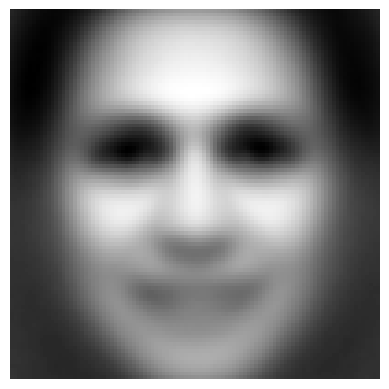

In [28]:
#visualize mean face
plt.imshow(mean_face.reshape(100,100), cmap='gray')
plt.axis('off')
plt.show()

In [29]:
#sub the mean face  

In [30]:
X_t = X- mean_face

In [31]:
#aplly X-t to PCA

In [32]:
pca = PCA(n_components=None, whiten=True, svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [36]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)



In [37]:
exp_var_df.set_index('principal_components', inplace=True)

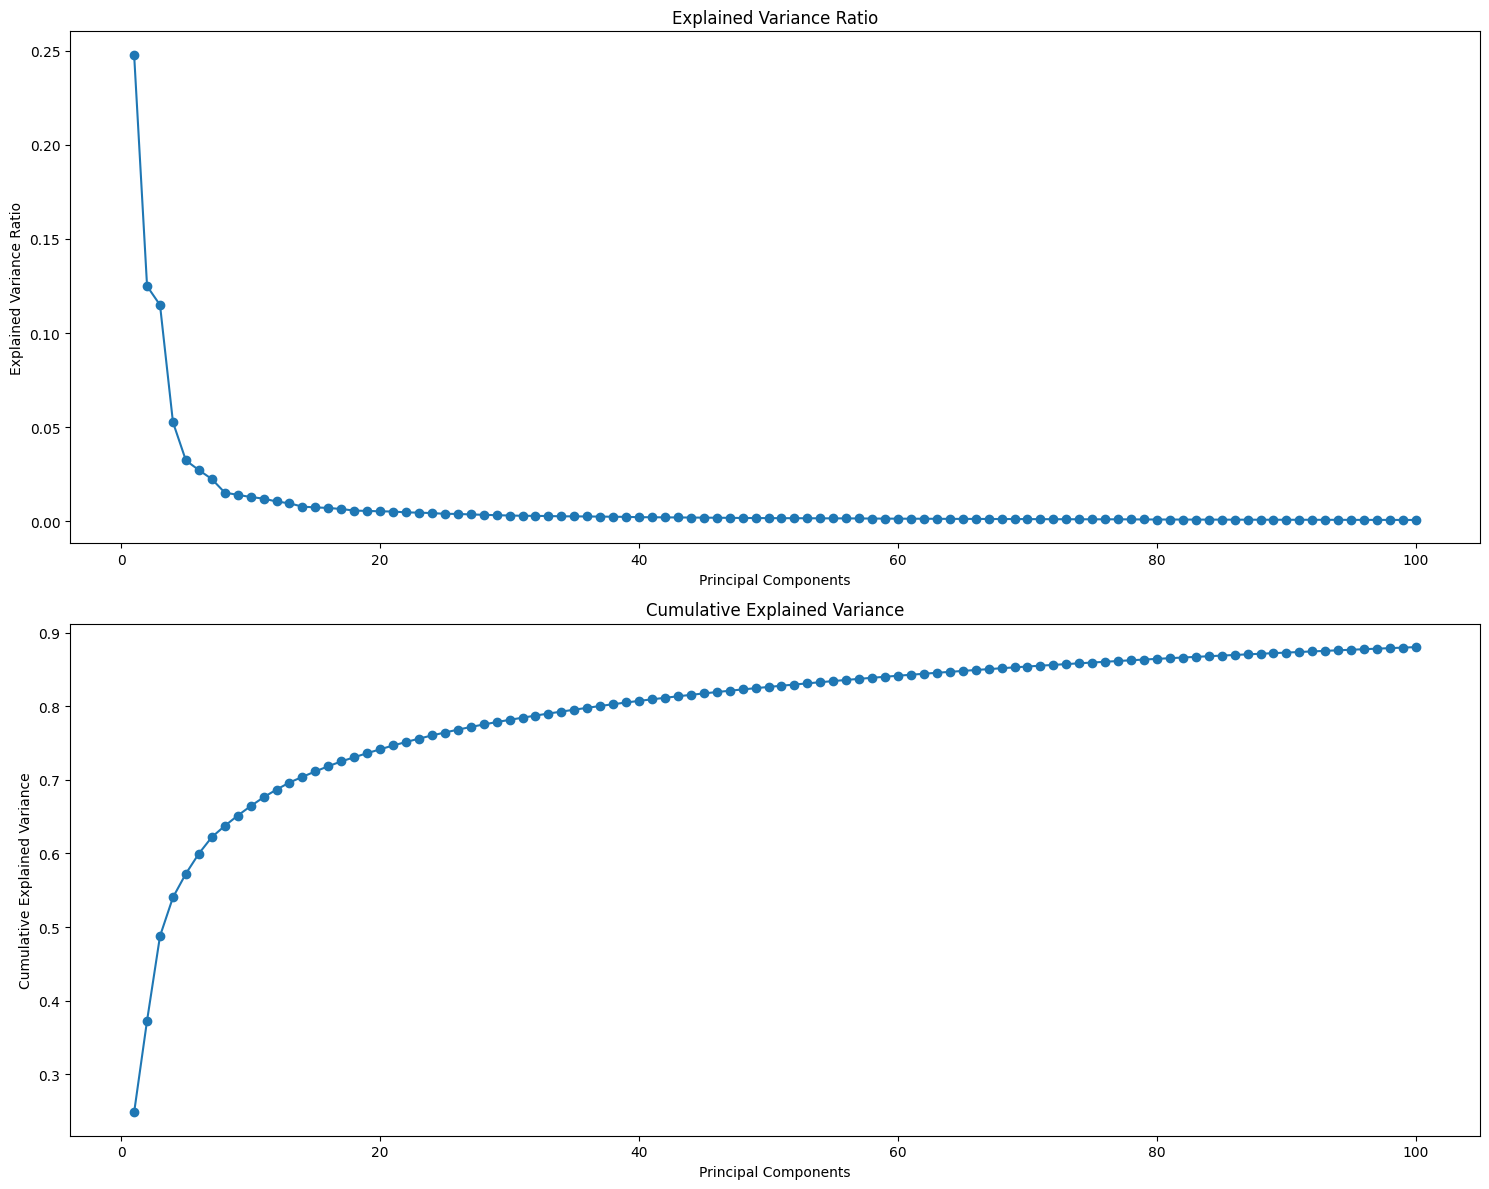

In [44]:
#visualize explanied variance
fig, ax = plt.subplots(nrows= 2, figsize=(15,12))

# Plot explained variance ratio
ax[0].plot(exp_var_df['explained_var'].head(100), marker='o')
ax[0].set_title('Explained Variance Ratio')
ax[0].set_xlabel('Principal Components')
ax[0].set_ylabel('Explained Variance Ratio')

# Plot cumulative explained variance
ax[1].plot(exp_var_df['cum_explained_var'].head(100), marker='o')
ax[1].set_title('Cumulative Explained Variance')
ax[1].set_xlabel('Principal Components')
ax[1].set_ylabel('Cumulative Explained Variance')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [46]:
pca_data.shape

(5609, 50)

In [48]:
# saving data and models
y = data['gender'].values
np.savez('./data/data_pca_50_target', pca_data, y)

In [50]:
# saving the model
pca_dict = {'pca' : pca_50, 'mean_face': mean_face}

In [51]:
pickle.dump(pca_dict, open('model/pca_dict.pickle', 'wb'))

In [ ]:
# visual eigen image

In [52]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [53]:
pca_data_inv.shape

(5609, 10000)

In [54]:
eig_img = pca_data_inv[0,:].reshape((100,100))


(-0.5, 99.5, 99.5, -0.5)

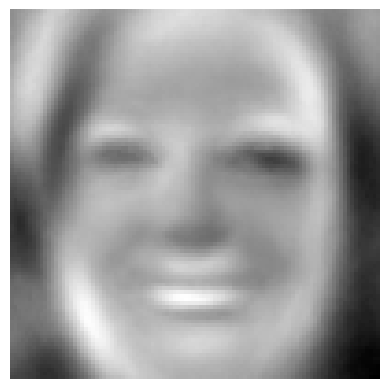

In [55]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

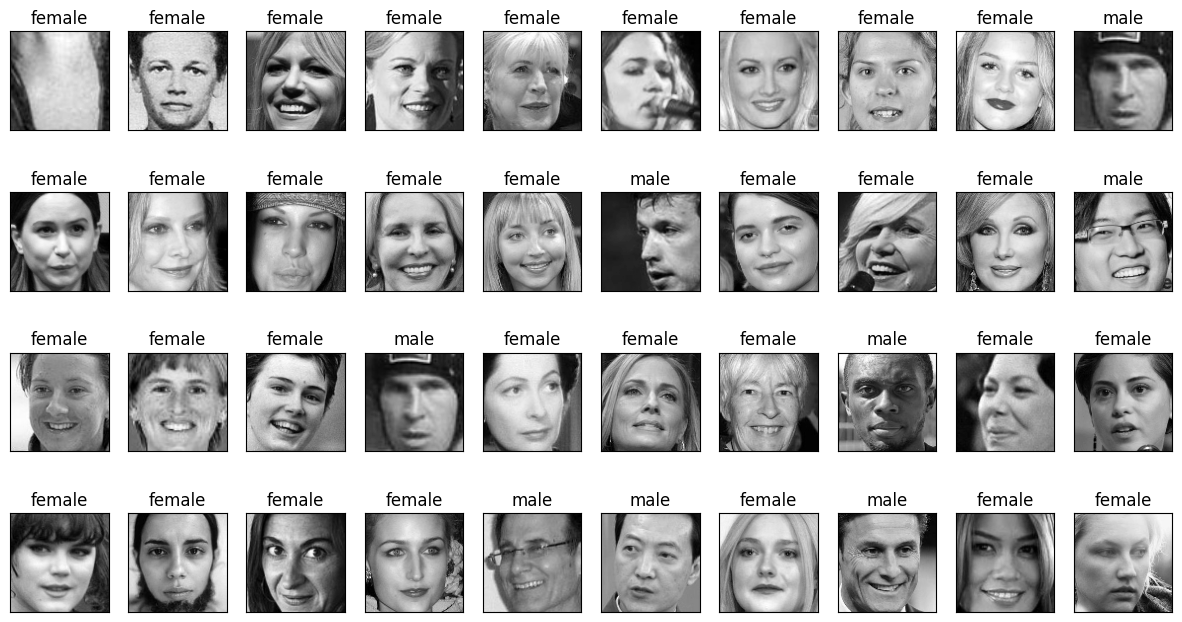

====================Eigen Images====================


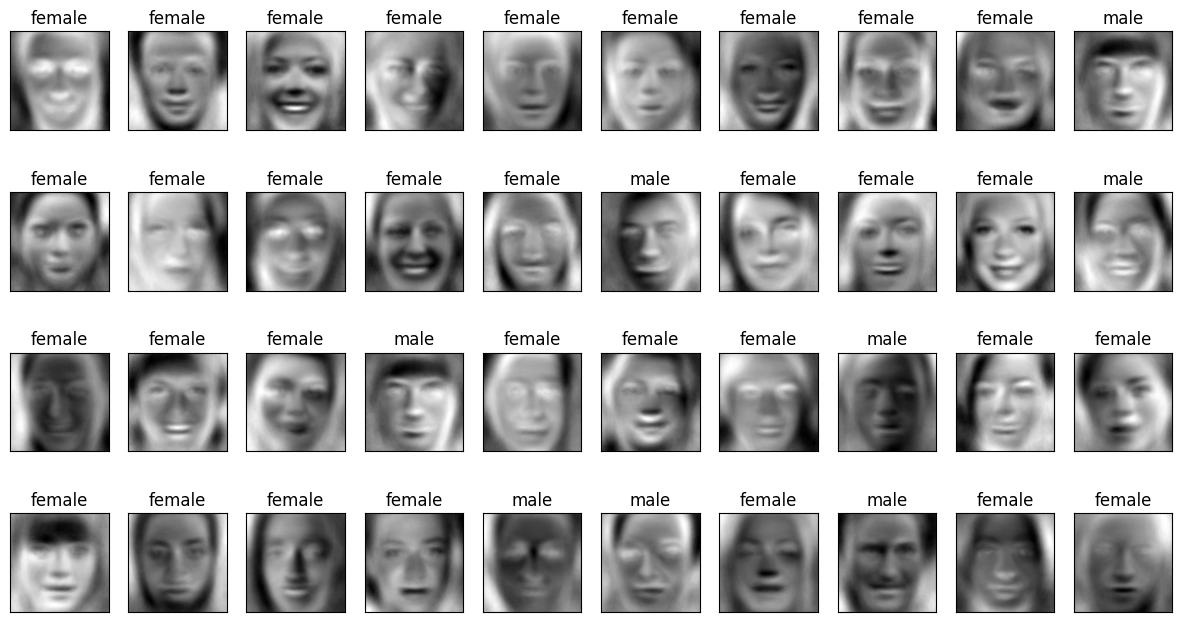

In [56]:
np.random.seed(1001)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()